# 处理思路

1. 把预测出来的掩膜图片进行合并
2. 对2015年的图片进行闭操作尽量联结，对2017年的图片进行开操作，减少噪声
3. 相减后取大于0的数，也就是新增的地上建筑物，置为1
4. 对新增建筑的标注图片进行开操作减少噪声
5. 加上官方提供的tinysample提高准确率

# 模型跑出来的结果
第一张图是4通道的原图，第二张图是模型运行出来的结果掩膜

In [ ]:
# import tifffile as tiff
# import matplotlib.pyplot as plt

# %matplotlib inline

# img_2015_0_0_256 = tiff.imread('input/result_image/2015_0_0_256.tif')

# pred_2015_0_9_256 = tiff.imread('output/result_pred/2015_0_0_256.tif')

# plt.figure(figsize=(18, 18))
# plt.subplot(121)
# plt.imshow(img_2015_0_0_256)
# plt.subplot(122)
# plt.imshow(pred_2015_0_9_256)

## 对小图片进行开操作

In [ ]:
# import tifffile as tiff
# import cv2
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# path = 'output/result_pred'
# path_save_o = 'output/result_pred_o'
# if not os.path.exists(path_save_o):
#     os.makedirs(path_save_o)
# image_list = create_file_lists_from_path(path, pattern='*.tif')
# for dic in image_list:
#     image = tiff.imread(dic['file'])
#     filename = dic['filename']
#     open_kernel = np.ones((10, 10), dtype=np.uint8)
#     image_open = cv2.morphologyEx(np.array(image), cv2.MORPH_OPEN, open_kernel)
#     ss = os.path.join(path_save_o, filename + '.tif')
#     cv2.imwrite(ss, image_open)

# print(ss)

# plt.figure(figsize=(10, 10))
# plt.subplot(121)
# plt.imshow(image)
# plt.subplot(122)
# plt.imshow(image_open)
# plt.show()
# print(image_open.shape)

# print('Open completed')

# 比较15和17的图片，生成结果-新建建筑的识别

In [ ]:
# import tifffile as tiff
# import os
# import numpy as np
# import cv2

# path = 'output/result_pred_o'
# pattern_2015 = '2015*.tif'
# pattern_2017 = '2017*.tif'
# path_save = 'output/result_pred_compare'
# if not os.path.exists(path_save):
#     os.makedirs(path_save)

# img_list_2015 = create_file_lists_from_path(path, pattern=pattern_2015)

# for img in img_list_2015:
#     image_2015 = tiff.imread(img['file'])
#     filename_2017 = '2017_' + '_'.join(img['filename'].split('_')[1:])
#     path_2017 = os.path.join(path, filename_2017+'.tif')
#     image_2017 = tiff.imread(path_2017)
#     image_batch_last = np.array((image_2017-image_2015)>0, dtype=np.uint8)
#     ss = os.path.join(path_save, '_'.join(img['filename'].split('_')[1:]) + '.tiff')
#     cv2.imwrite(ss, image_batch_last)

# print('Generate completed')

# 1. 模型预测地上建筑物的完整图片合并

把预测出来的大小256的掩膜图片进行合并

预测结果图片的路径：output/result_pred

保存路径：

- output/tiny_15.tif
- output/tiny_15.tif

变量名：img_tiny_15, img_tiny_17

# 显示15、17pred图像

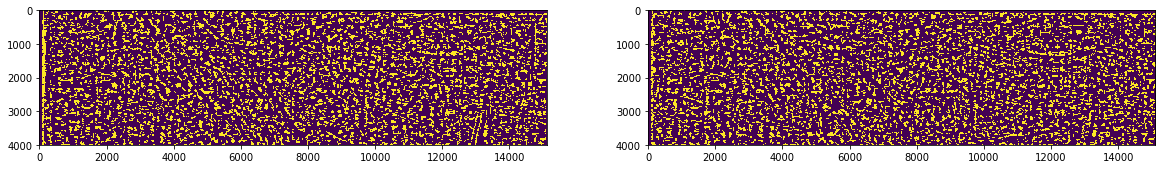

In [43]:
import numpy as np
import tifffile as tiff
import os
import matplotlib.pyplot as plt
%matplotlib inline

img_pred_15 = tiff.imread('output/tiny_15.tif')
img_pred_17 = tiff.imread('output/tiny_17.tif')

# 查看两年模型预测地上建筑的结果
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(img_pred_15)
plt.subplot(122)
plt.imshow(img_pred_17)
plt.show()

In [37]:
print(img_pred_15.sum().astype(float)/255/img_pred_15.shape[0]/img_pred_15.shape[1])

0.280679746458


In [38]:
print(np.unique(img_pred_15))

[  0 255]


# 显示15、17河道图像

In [ ]:
# img_pred_15 = tiff.imread('output/river_15.tif')
# img_pred_17 = tiff.imread('output/river_17.tif')

# # 查看两年模型预测地上建筑的结果
# plt.figure(figsize=(20, 20))
# plt.subplot(121)
# plt.imshow(img_pred_15)
# plt.subplot(122)
# plt.imshow(img_pred_17)
# plt.show()

In [ ]:
# _,contours, hierarchy = cv2.findContours(img_pred_17,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

# cv2.drawContours(img_pred_17,contours,-1,(0,0,255),3) 

# # 查看两年模型预测地上建筑的结果
# plt.figure(figsize=(20, 20))
# plt.subplot(121)
# plt.imshow(img_pred_15)
# plt.subplot(122)
# plt.imshow(img_pred_17)
# plt.show()

# 2. 对2015年的图片进行闭操作，对2017年的图片进行开操作

In [ ]:
# import numpy as np
# import tifffile as tiff
# import cv2

# # path setting
# path_15 = 'output/tiny_15.tif'
# path_17 = 'output/tiny_17.tif'
# path_save_15 = 'output/tiny_close_15.tif'
# path_save_17 = 'output/tiny_open_17.tif'

# # load images
# img_15 = tiff.imread(path_15)
# img_17 = tiff.imread(path_17)

# # 开闭操作
# close_kernel = np.ones((20, 20), dtype=np.uint8)
# img_close_15 = cv2.morphologyEx(np.array(img_15), cv2.MORPH_CLOSE, close_kernel)

# open_kernel = np.ones((10, 10), dtype=np.uint8)
# img_open_17 = cv2.morphologyEx(np.array(img_17), cv2.MORPH_OPEN, open_kernel)

# # 格式转换和图片保存
# img_close_15 = np.array(img_close_15, np.uint8)
# tiff.imsave(path_save_15, img_close_15)
# img_open_17 = np.array(img_open_17, np.uint8)
# tiff.imsave(path_save_17, img_open_17)

# # 查看两年模型预测地上建筑开闭操作后的结果
# plt.figure(figsize=(20, 20))
# plt.subplot(121)
# plt.imshow(img_close_15)
# plt.subplot(122)
# plt.imshow(img_open_17)
# plt.show()

In [ ]:
# import numpy as np
# import tifffile as tiff
# import os
# import matplotlib.pyplot as plt
# %matplotlib inline

# IM_ROWS = 5106
# IM_COLS = 15106
# IMAGE_SIZE = 256

# path = 'output/result_pred' # 模型输出的图片
# path_save = 'output'

# im_tiny = np.zeros((IM_ROWS, IM_COLS))

# for i in range(int(IM_ROWS // IMAGE_SIZE)):
#     for j in range(int(IM_COLS // IMAGE_SIZE)):
#         ss = os.path.join(path, '2017_{}_{}_{}.tif'.format(i, j, IMAGE_SIZE)) # 模型输出的图片合并
#         image = tiff.imread(ss)
#         im_tiny[i*IMAGE_SIZE:(i+1)*IMAGE_SIZE, j*IMAGE_SIZE:(j+1)*IMAGE_SIZE] = image

# # 填补行边角图片
# if IM_ROWS%IMAGE_SIZE != 0:
#     i = i+1
#     for k in range(int(IM_COLS // IMAGE_SIZE)):
#         ss = os.path.join(path, '2017_{}_{}_{}.tif'.format(i, k, IMAGE_SIZE)) # 模型输出的图片合并
#         image = tiff.imread(ss)
#         im_tiny[i*IMAGE_SIZE:IM_ROWS, k*IMAGE_SIZE:(k+1)*IMAGE_SIZE] = image[IMAGE_SIZE-(IM_ROWS-i*IMAGE_SIZE):, :]

# # 填补列边角图片
# if IM_COLS%IMAGE_SIZE != 0:
#     j = j+1
#     for k in range(int(IM_ROWS // IMAGE_SIZE)):
#         ss = os.path.join(path, '2017_{}_{}_{}.tif'.format(k, j, IMAGE_SIZE)) # 模型输出的图片合并
#         image = tiff.imread(ss)
#         im_tiny[k*IMAGE_SIZE:(k+1)*IMAGE_SIZE, j*IMAGE_SIZE:IM_COLS] = image[:, IMAGE_SIZE-(IM_COLS-j*IMAGE_SIZE):]
        
# if IM_ROWS%IMAGE_SIZE != 0 and IM_ROWS%IMAGE_SIZE != 0:
#     ss = os.path.join(path, '2017_{}_{}_{}.tif'.format(i, j, IMAGE_SIZE)) # 模型输出的图片合并
#     image = tiff.imread(ss)
#     im_tiny[i*IMAGE_SIZE:IM_ROWS, j*IMAGE_SIZE:IM_COLS] = image[IMAGE_SIZE-(IM_ROWS-i*IMAGE_SIZE):, IMAGE_SIZE-(IM_COLS-j*IMAGE_SIZE):]

# img_tiny_17 = np.array(im_tiny, np.uint8)

# plt.figure(figsize=(20, 20))
# plt.imshow(img_tiny_17)
# plt.show()

# 3. 相减后取大于0的数，也就是新增的地上建筑物，置为1

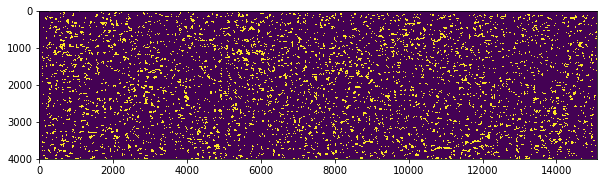

In [44]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
%matplotlib inline

# path setting
# 完整流程
path_15 = 'output/tiny_15.tif'
path_17 = 'output/tiny_17.tif'

# 不做2步中的闭操作和开操作
# path_15 = 'output/tiny_15.tif'
# path_17 = 'output/tiny_17.tif'

path_save = 'output/tiny_close_open_mius_1517.tif'

img_15 = tiff.imread(path_15)
img_17 = tiff.imread(path_17)

img_minus = img_17>img_15

# 格式转换和图片保存
img_minus = np.array(img_minus, np.uint8)
tiff.imsave(path_save, img_minus)

plt.figure(figsize=(10, 10))
plt.imshow(img_minus)
plt.show()

# 1517图像做差后减去河道

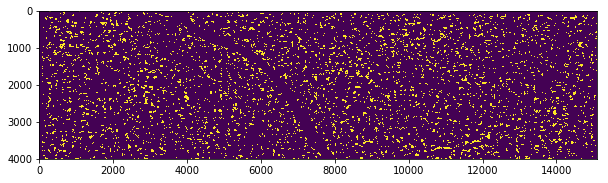

In [45]:
path = 'output/tiny_close_open_mius_1517.tif'
# path_river = 'output/channel4_threshold.tif'
path_river = 'output/channel24_NDWI_river.tif'

path_save = 'output/tiny_mius_river_1517.tif'

img = tiff.imread(path)
img_river = tiff.imread(path_river)

img_minus = img>img_river

img_minus = np.array(img_minus, np.uint8)

tiff.imsave(path_save, img_minus)

plt.figure(figsize=(10, 10))
plt.imshow(img_minus)
plt.show()

# 4. 对新增建筑的标注图片进行开操作减少噪声

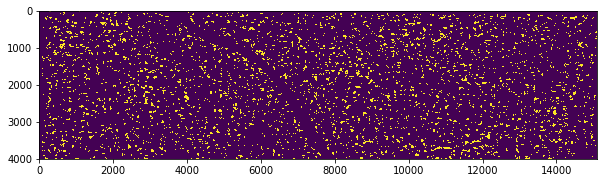

In [46]:
import numpy as np
import tifffile as tiff
import cv2

# path setting
path = 'output/tiny_mius_river_1517.tif'
path_save = 'output/tiny_mius_river_open_1517.tif'

img = tiff.imread(path)

open_kernel = np.ones((5, 5), dtype=np.uint8)
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, open_kernel)

# 格式转换和图片保存
img_open = np.array(img_open, np.uint8)
tiff.imsave(path_save, img_open)

plt.figure(figsize=(10, 10))
plt.imshow(img_open)
plt.show()

In [47]:
print(img_open.sum().astype(float)/255/img_pred_15.shape[0]/img_pred_15.shape[1])

0.000303249520383


# 5. 和tiny_sample进行合并提高准确率

## 官方给的例子图片

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(tiny_sample[:,:,0])
plt.show()

# 6. 查看结果

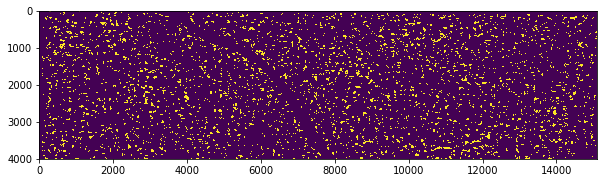

In [48]:
import tifffile as tiff
import matplotlib.pyplot as plt
import os
%matplotlib inline

path = 'output/tiny_mius_river_open_1517.tif'
# file_path = 'output/tiny_and_sample_1517.tif'

submission = tiff.imread(path)
plt.figure(figsize=(10, 10))
plt.imshow(submission)
plt.show()

In [49]:
print(submission.sum().astype(float)/255/img_pred_15.shape[0]/img_pred_15.shape[1])

0.000303249520383


In [51]:
print(type(submission))
print(submission.shape)
print(np.unique(submission))
print(submission.dtype)

<type 'numpy.ndarray'>
(4000, 15106)
[0 1]
uint8
